# Importing Libraries

In [1]:
import sys
sys.path.append('..')

In [2]:
from letcon.src.data_loader import data_ml
from letcon.src.model import model_ml

import shap
import pandas as pd

shap.initjs()

Initializing Logger Path...
Logger Path Exists...
Path for Logger-->C:/Users/SPARS/Desktop/LETCON-Conference/letcon2020-ml-workshop/notebooks/Logs/
Initializing Artifacts Path...
Artifacts Path Exists...
Path for Artifacts-->C:/Users/SPARS/Desktop/LETCON-Conference/letcon2020-ml-workshop/notebooks/Artifacts/


# Loading Data

In [3]:
TrainData = pd.read_csv('data/wine-quality/winequality-white-updated.csv')

# Custom Data Processing Library

## Creating config for our data processing library

In [4]:
data_config= {'train_data' : TrainData,
              'test_data' : None,
              'unique_id' : None,
              'time_id' : None,
              'x_vars' : [
                         'fixed_acidity', 
                         'volatile_acidity', 
                         'citric_acid', 
                         'residual_sugar',
                         'chlorides', 
                         'free_sulfur_dioxide', 
                         'total_sulfur_dioxide', 
                         'density',
                         'pH', 
                         'sulphates', 
                         'alcohol', 
              ],
              'cat_vars' : [],
              'y_var' : 'quality',
              'stratify' : 'quality',
              'test_size' : 0.20,
              'use_full_dataset' : True,
              'encoding_style' : 'label_encoding',
              'impute_missing' : 'mean',
              'capping_vars' : {},
              'task' : 'regression',
              'random_state' : 42,
}

## Initializing data processing object

In [5]:
data = data_ml.DataLoader(config=data_config)

test_data is none. Setting test_data equal to train_data


In [6]:
print(data)

Train and Test Size are (4898, 11), (4898, 11)
Stratified on quality with Stratification Ratio:0.2


In [7]:
print(data.__repr__())

{'Train Size': (4898, 11), 'Test Size': (4898, 11), 'Stratified on': 'quality', 'Stratification Ratio': 0.2}


In [8]:
print(data.__str__())

Train and Test Size are (4898, 11), (4898, 11)
Stratified on quality with Stratification Ratio:0.2


# Custom Modelling Library

## Creating config for our modelling library

In [9]:
modelling_config = {
            'data': data.get_data(),
            'model_type' : 'simple',
            'model_name' : 'xgboost',
            'model_inputs' : {},
            'scoring_function' : 'r2',
            'model_initial_params' : {'verbose':True,
                                     'boosting': 'gbtree',
                                     'tree_method': 'exact',
                                     'n_estimators': 127,
                                     'max_depth': 9,
                                     'reg_alpha': 10,
                                     'reg_lambda': 22,
                                     'min_child_weight': 1,
                                     'gamma': 1,
                                     'learning_rate': 0.4901527567844427,
                                     },
            'hyperparmeter_tuning' : {'enable_tuning' : True,
                                      'optimizer' : 'optuna',
                                      'optimizer_params' : {'fixed' : {'n_trials' : 10},
                                                            'varying' : {'boosting' : ['gbtree', 'gblinear'],
                                                                         'tree_method' : ['exact','approx','hist'],
                                                                         'n_estimators' : {'min' : 50, 'max' :200},
                                                                         'max_depth' : {'min' : 2, 'max' : 10},
                                                                         'reg_alpha' : {'min' : 0, 'max' : 10},
                                                                         'reg_lambda' : {'min' : 0, 'max' : 25},
                                                                         'min_child_weight' : {'min' : 0, 'max' : 1},
                                                                         'gamma' : {'min' : 0, 'max' : 50},
                                                                         'learning_rate' : {'min' : 0.3, 'max' : 0.5}
                                                                        }
                                                           },        
                                    },
            'shap_analysis' : {'enable_shap' : True,
                               'use_explainer' : 'tree',
                            },
    
            'task' : 'regression',
            'random_state' : 42,
}

## Initializing modelling object

In [10]:
model = model_ml.Model(config=modelling_config)
model.create_model()

[I 2020-08-22 14:12:47,362] Finished trial#0 with value: 0.3639606511502458 with parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'n_estimators': 64, 'max_depth': 9, 'reg_alpha': 4, 'reg_lambda': 6, 'min_child_weight': 1, 'gamma': 18, 'learning_rate': 0.3157188882096635}. Best is trial#0 with value: 0.3639606511502458.
[I 2020-08-22 14:12:47,656] Finished trial#1 with value: 0.70647199820375 with parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'n_estimators': 149, 'max_depth': 9, 'reg_alpha': 7, 'reg_lambda': 2, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.4338062248425382}. Best is trial#1 with value: 0.70647199820375.
[I 2020-08-22 14:12:47,900] Finished trial#2 with value: 0.35382746975740387 with parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'n_estimators': 179, 'max_depth': 6, 'reg_alpha': 0, 'reg_lambda': 11, 'min_child_weight': 1, 'gamma': 21, 'learning_rate': 0.301084851720929}. Best is trial#1 with value: 0.70647199820375.
[I 2020-

## Best hyperparameters found using optuna

In [11]:
model.model_best_params

{'boosting': 'gbtree',
 'tree_method': 'exact',
 'n_estimators': 149,
 'max_depth': 9,
 'reg_alpha': 7,
 'reg_lambda': 2,
 'min_child_weight': 1,
 'gamma': 1,
 'learning_rate': 0.4338062248425382}

## Inference and printing the results

In [12]:
model.do_model_inference(model=model.trained_model, return_score=True)

(0.70647199820375, 0.70647199820375)

# Model Interpretation

## SHAP Values

**SHAP Values (an acronym from SHapley Additive exPlanations)** break down a prediction to show the impact of each feature. Where could you use this?

- A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
- A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions

You'll use SHAP Values to explain individual predictions in this lesson. In the next lesson, you'll see how these can be aggregated into powerful model-level insights.

## Call the SHAP analysis method from custom library

**Summary Plots**

Permutation importance is great because it created simple numeric measures to see which features mattered to a model. This helped us make comparisons between features easily, and you can present the resulting graphs to non-technical audiences.

But it doesn't tell you how each features matter. If a feature has medium permutation importance, that could mean it has a large effect for a few predictions, but no effect in general, or a medium effect for all predictions.
SHAP summary plots give us a birds-eye view of feature importance and what is driving it. We'll walk through an example plot for the soccer data:

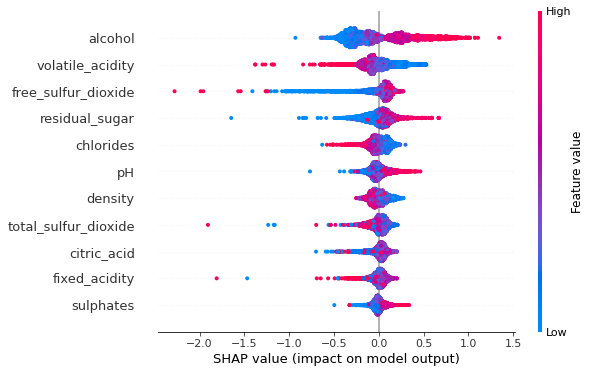

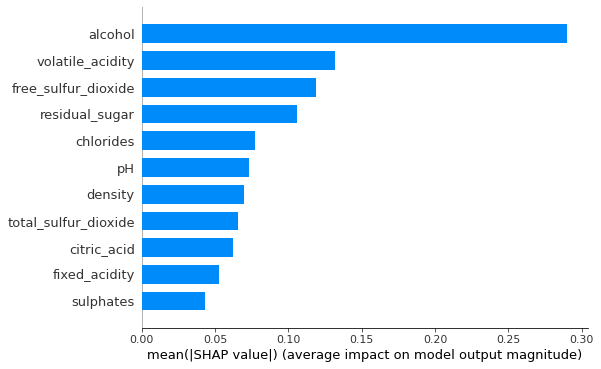

In [13]:
model.do_shap_analysis()

This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

## Visualizing local row level shap for the first example in the data

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

In [14]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(model.shap_explainer.expected_value, model.shap_values[0,:], model.xtrain.iloc[0,:])

**SHAP Dependence Contribution Plots**

We've previously used Partial Dependence Plots to show how a single feature impacts predictions. These are insightful and relevant for many real-world use cases. Plus, with a little effort, they can be explained to a non-technical audience.

But there's a lot they don't show. For instance, what is the distribution of effects? Is the effect of having a certain value pretty constant, or does it vary a lot depending on the values of other feaures. SHAP dependence contribution plots provide a similar insight to PDP's, but they add a lot more detail.

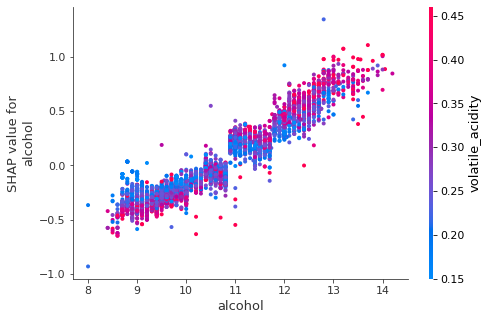

In [18]:
shap.dependence_plot('alcohol', model.shap_values, model.xtrain, interaction_index="volatile_acidity")

If you don't supply an argument for interaction_index, Shapley uses some logic to pick one that may be interesting.

This didn't require writing a lot of code. But the trick with these techniques is in thinking critically about the results rather than writing code itself.